In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from pmdarima import auto_arima
from statsmodels.tsa.api import VAR

#To Ignore Warning messages

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\envs\myenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HP\anaconda3\envs\myenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\\Data\\M2SL.csv",index_col='DATE',parse_dates=True)

sp=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\\Data\\PCE.csv",index_col='DATE',parse_dates=True)

In [10]:
index=pd.date_range('1995-01-01','2020-10-01',freq='MS')

In [12]:
df.index=index
sp.index=index

In [13]:
df=df.join(sp)

In [18]:
df=df.iloc[:252]

<AxesSubplot:>

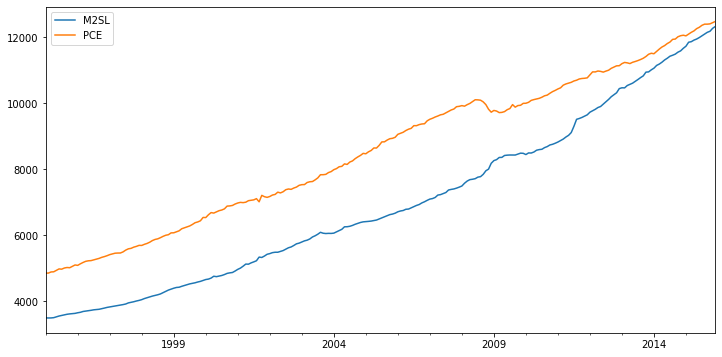

In [20]:
df.plot(figsize=(12,6))

In [33]:
df.columns=['Money','Spendings']

In [34]:
df

,Money,Spendings
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12097.6,12400.9
2015-09-01,12153.1,12400.9
2015-10-01,12185.0,12409.3
2015-11-01,12274.2,12446.3


In [39]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    from statsmodels.tsa.stattools import adfuller
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [40]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.219049
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [42]:
adf_test(df['Spendings'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.197890
p-value                   0.972143
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [43]:
df_transformed=df.diff()

In [48]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.076641e+00
p-value                 4.783030e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [49]:
adf_test(df_transformed['Spendings'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.763521e+00
p-value                 2.634927e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [53]:
#df_transformed=df_transformed.diff()

In [50]:
#df_transformed=df_transformed.dropna()

In [54]:
df_transformed

,Money,Spendings
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-1.0,-25.5
2015-09-01,4.5,-34.8
2015-10-01,-23.6,8.4
2015-11-01,57.3,28.6


In [55]:
nobs=12

In [56]:
train=df_transformed.iloc[:-nobs]
test=df_transformed.iloc[-nobs:]

### GRIDSEARCH FOR ORDER p AR FOR VAR

In [57]:
model=VAR(train)

for p in range(1,8):
    results=model.fit(p)
    print(f"ORDER {p}")
    print(f"AIC: {results.aic}")

ORDER 1
AIC: 14.184746955713575
ORDER 2
AIC: 13.958816257243491
ORDER 3
AIC: 13.855157304170763
ORDER 4
AIC: 13.833776093682921
ORDER 5
AIC: 13.79273881657879
ORDER 6
AIC: 13.804219880373077
ORDER 7
AIC: 13.802755047357277


In [59]:
results=model.fit(5)

In [61]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Dec, 2020
Time:                     01:31:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1186
Nobs:                     233.000    HQIC:                   13.9241
Log likelihood:          -2246.08    FPE:                    977623.
AIC:                      13.7927    Det(Omega_mle):         891463.
--------------------------------------------------------------------
Results for equation Money
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.509644         1.780532            0.286           0.775
L1.Money            -0.644432         0.068082           -9.465           0.000
L1.Spendings        -0.110874         0.051109           -2.169 

In [65]:
lagged_values=train.values[-5:]

In [67]:
z=results.forecast(y=lagged_values,steps=12)

In [69]:
idx=pd.date_range('2015-01-01',periods=12,freq='MS')

In [71]:
df_forecast=pd.DataFrame(z,index=idx,columns=['Money_2','Spendings_2'])

<AxesSubplot:>

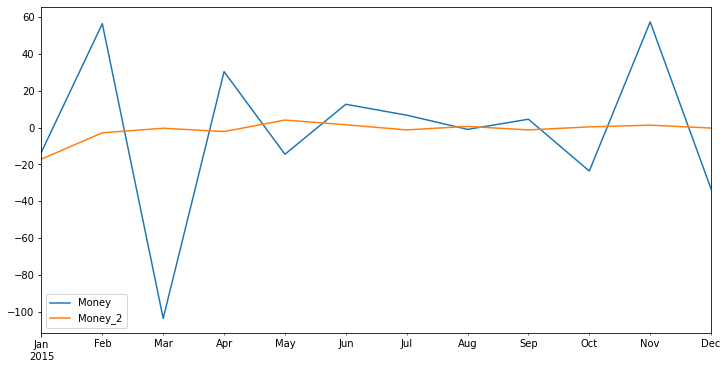

In [73]:
test['Money'].plot(legend=True,figsize=(12,6))
df_forecast['Money_2'].plot(legend=True,figsize=(12,6))

In [93]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money_1']=df_forecast['Money_2'].cumsum()+(df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2])

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast']=df_forecast['Money_1'].cumsum()+df['Money'].iloc[-nobs-1]

In [94]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spendings_1']=df_forecast['Spendings_2'].cumsum()+(df['Spendings'].iloc[-nobs-1]-df['Spendings'].iloc[-nobs-2])

# Now build the forecast values from the first difference set
df_forecast['SpendingsForecast']=df_forecast['Spendings_1'].cumsum()+df['Spendings'].iloc[-nobs-1]

In [96]:
test_range=df.iloc[-nobs:]

<AxesSubplot:>

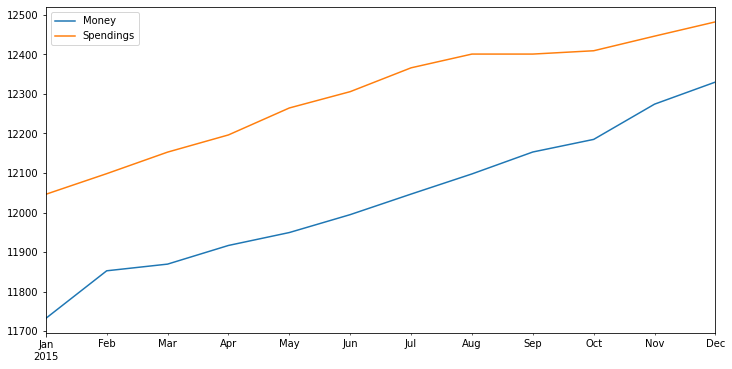

In [97]:
test_range.plot(figsize=(12,6))

<AxesSubplot:>

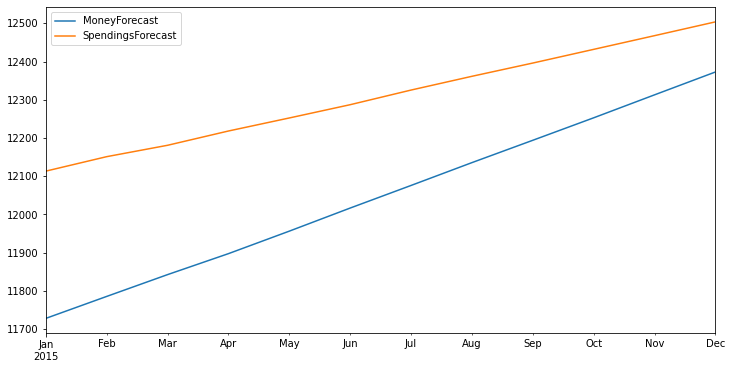

In [99]:
df_forecast[['MoneyForecast','SpendingsForecast']].plot(figsize=(12,6))

<AxesSubplot:>

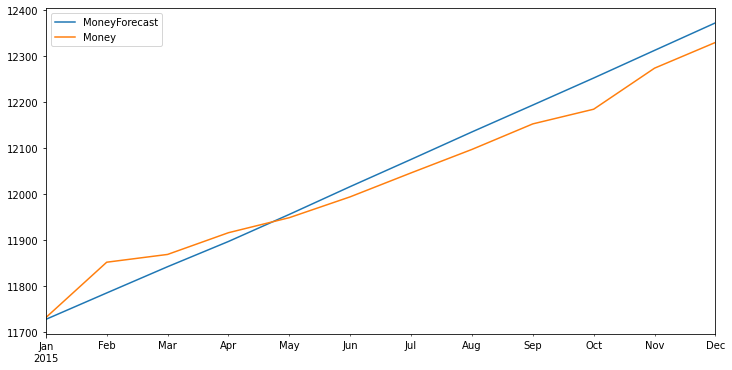

In [103]:
df_forecast['MoneyForecast'].plot(figsize=(12,6),legend=True)
test_range['Money'].plot(figsize=(12,6),legend=True)

<AxesSubplot:>

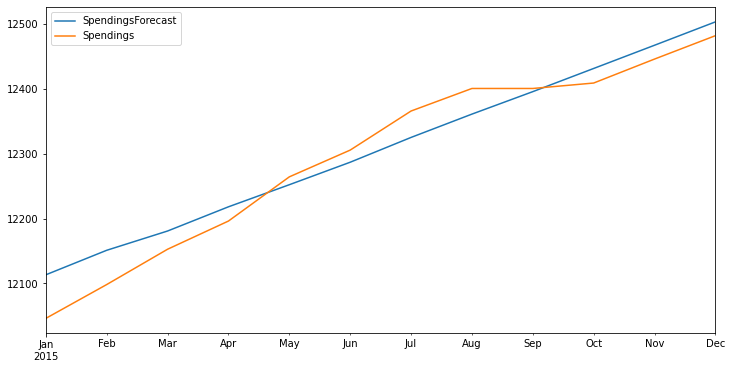

In [102]:
df_forecast['SpendingsForecast'].plot(figsize=(12,6),legend=True)
test_range['Spendings'].plot(figsize=(12,6),legend=True)

In [104]:
from statsmodels.tools.eval_measures import rmse,mse

In [105]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

38.70110485554438

In [106]:
mse(test_range['Money'],df_forecast['MoneyForecast'])

1497.7755170398407

In [107]:
rmse(test_range['Spendings'],df_forecast['SpendingsForecast'])

33.854642352529744

In [108]:
mse(test_range['Spendings'],df_forecast['SpendingsForecast'])

1146.1368088177007